In [148]:
import math
import matplotlib.pyplot as plt

In [181]:
x0, y0, radius, num_points = 0.5, 0.5, 0.6, 8

coord_points = []
for i in range(0, 360, int(360 / num_points)):
    coord_points.append((radius * math.cos(i * math.pi / 180) + x0, radius * math.sin(i * math.pi / 180) + y0))

In [182]:
def draw_background(ax, points):
    for (x, y) in points:
        ax.plot(x, y, 'ro')
    ax.set_xlim(-0.3, 1.3)
    ax.set_ylim(-0.3, 1.3)
    ax.set_ylabel('y, meters')
    ax.set_xlabel('x, meters')
    ax.grid(True)

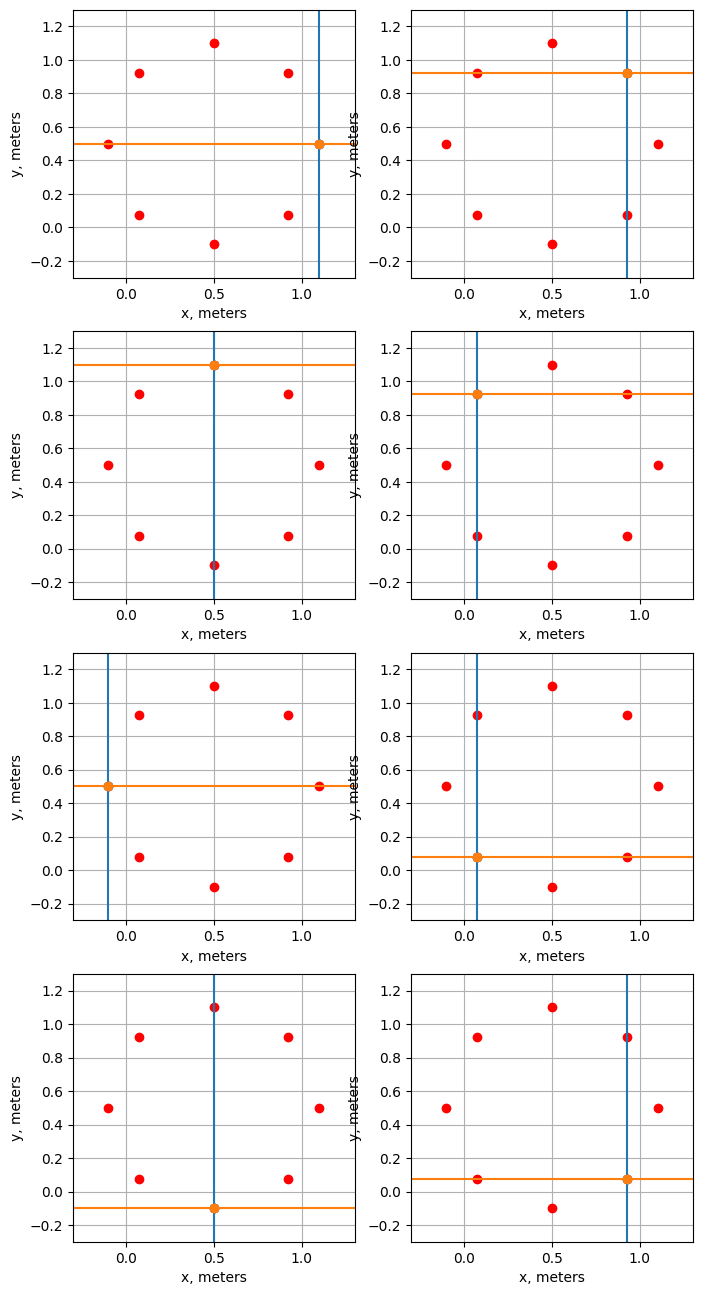

In [183]:
n_rows = (len(coord_points) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(8, n_rows * 4))
axs = axs.flatten()
for i, (x, y) in enumerate(coord_points):
    draw_background(axs[i], coord_points)
    axs[i].plot([x, x, x], [-0.4, y, 1.4], [-0.4, x, 1.4], [y, y, y], marker = 'o')

In [184]:
len_unit = 1.2
mass = len_unit * 1.9
q, w, M1, M2, M3 = [], [], [], [], []

In [185]:
coord_points.insert(0, (0.5, 0.5))
for i in range(1, len(coord_points)):
    x_curr, y_curr = coord_points[i]
    x_last, y_last = coord_points[i - 1]  
    q.append((x_curr - x_last, y_curr - y_last))
coord_points.pop(0)

q.insert(0, (0, 0))
for i in range(1, len(q)):
    q1_curr, q2_curr = q[i]
    q1_last, q2_last = q[i - 1]
    w.append((q1_curr - q1_last, q2_curr - q2_last))
q.pop(0)

for (w1, w2) in w:
    M1.append((2 * mass * w1, mass * w2))

M1.insert(0, (0, 0))
for i in range(1, len(M1)):
    m1_curr, m2_curr = M1[i]
    m1_last, m2_last = M1[i - 1]
    M2.append((m1_curr - m1_last, m2_curr - m2_last))
M1.pop(0)

M2.insert(0, (0, 0))
for i in range(1, len(M2)):
    m1_curr, m2_curr = M2[i]
    m1_last, m2_last = M2[i - 1]
    M3.append((m1_curr - m1_last, m2_curr - m2_last))
M2.pop(0)

(0, 0)

In [186]:
print("       xi     yi     q1     q2     w1     w2    m1_1    m1_2    m2_1    m2_2    m3_1    m3_2")
for i, ((x, y), (q1, q2), (w1, w2), (m1_1, m1_2), (m2_1, m2_2), (m3_1, m3_2)) in enumerate(zip(coord_points, q, w, M1, M2, M3)):
    print(f"{(i + 1):>2}. {x:>6.3f} {y:>6.3f} {q1:>6.3f} {q2:>6.3f} {w1:>6.3f} {w2:>6.3f} {m1_1:>7.4f} {m1_2:>7.4f} {m2_1:>7.4f} {m2_2:>7.4f} {m3_1:>7.4f} {m3_2:>7.4f}")

       xi     yi     q1     q2     w1     w2    m1_1    m1_2    m2_1    m2_2    m3_1    m3_2
 1.  1.100  0.500  0.600  0.000  0.600  0.000  2.7360  0.0000  2.7360  0.0000  2.7360  0.0000
 2.  0.924  0.924 -0.176  0.424 -0.776  0.424 -3.5374  0.9673 -6.2734  0.9673 -9.0094  0.9673
 3.  0.500  1.100 -0.424  0.176 -0.249 -0.249 -1.1333 -0.5666  2.4041 -1.5340  8.6774 -2.5013
 4.  0.076  0.924 -0.424 -0.176  0.000 -0.351  0.0000 -0.8014  1.1333 -0.2347 -1.2708  1.2993
 5. -0.100  0.500 -0.176 -0.424  0.249 -0.249  1.1333 -0.5666  1.1333  0.2347 -0.0000  0.4694
 6.  0.076  0.076  0.176 -0.424  0.351 -0.000  1.6027 -0.0000  0.4694  0.5666 -0.6639  0.3319
 7.  0.500 -0.100  0.424 -0.176  0.249  0.249  1.1333  0.5666 -0.4694  0.5666 -0.9388  0.0000
 8.  0.924  0.076  0.424  0.176 -0.000  0.351 -0.0000  0.8014 -1.1333  0.2347 -0.6639 -0.3319
